In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.9/78.2 GB disk)


In [ ]:
#!unzip -q /content/drive/MyDrive/weapon_no_weapon.zip -d /content/drive/MyDrive

In [ ]:
# import shutil
# shutil.rmtree('/content/yolov5')

In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data /content/yolov5/data/weapon_data.yaml --weights yolov5s.pt --nosave --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/data/weapon_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=True, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.01

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/last.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/test_video.mp4

detect: weights=['/content/yolov5/runs/train/exp/weights/last.pt'], source=/content/drive/MyDrive/test_video.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-227-ge4df1ec Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/1560) /content/drive/MyDrive/test_video.mp4: 384x640 2 pistols, 45.3ms
video 1/1 (2/1560) /content/drive/MyDrive/test_video.mp4: 384x640 2 pistols, 7.9ms
video 1/1 (3/1560) /content/drive/MyDrive/test_video.mp4: 384x640 1 pistol, 7.9ms
video 1/1 (4/1560) /content/drive/MyDrive/test_

XAI

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras import backend as K
import os
import tensorflow as tf

# Path to train and test directory
dir_ = '/content/drive/MyDrive/weapon_no_weapon'


# Generate training and test data with Image Generator
train_datagen = ImageDataGenerator(rescale=1/255,
                                  validation_split = 0.2)


train_generator = train_datagen.flow_from_directory(dir_,target_size=(100, 100),
                                                   batch_size= 1920,
                                                   class_mode='categorical',
                                                   shuffle=False,
                                                   subset = 'training')

test_generator = train_datagen.flow_from_directory(dir_,
                                                          target_size = (100,100),
                                                          batch_size = 480,
                                                          class_mode = 'categorical',
                                                          shuffle=False,
                                                          subset = 'validation')


# Fetch the data and the labels
x_train, y_train = next(train_generator)
x_test, y_test  = next(test_generator)

# Fix the filepath
test_filepath = []
for filepath in test_generator.filepaths:
    filepath = filepath.replace('\\', '/')
    test_filepath.append(filepath)

Found 81 images belonging to 2 classes.
Found 19 images belonging to 2 classes.


In [ ]:
model = Sequential([

    # First convolution
        Conv2D(16, (3,3), activation='relu', input_shape=(100,100, 3)),
        MaxPooling2D(2, 2),

    # Second convolution
        Conv2D(32, (3,3), activation='relu'),
        MaxPooling2D(2,2),

    # Third convolution
        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Flatten(),

    # Dense hidden layer
        Dense(512, activation='relu'),
        Dropout(0.2),

    # Output neuron.
        Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
!pip3 install scikit-image

In [ ]:

import skimage.io
from tensorflow.keras.preprocessing import image

url = '/content/drive/MyDrive/weapon_no_weapon/weapon/IMG11.jpg'

def read_and_transform_img(url):

    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (100,100))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    return img

images = read_and_transform_img(url)

preds = model.predict(images)
prediction = np.argmax(preds)
pct = np.max(preds)
if prediction == 0:
    print('No Weapons detected')
else:
    print('Weapon detected')

print(pct)

1/1 [==============================] - 0s 141ms/step
Weapon detected
0.52793074


In [ ]:
!pip install lime
from lime import lime_image
explainer = lime_image.LimeImageExplainer()

In [ ]:
explanation = explainer.explain_instance(images[0].astype('double'), model.predict,
                                         top_labels=2, hide_color=0, num_samples=100)

  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 69ms/step


(-0.5, 99.5, 99.5, -0.5)

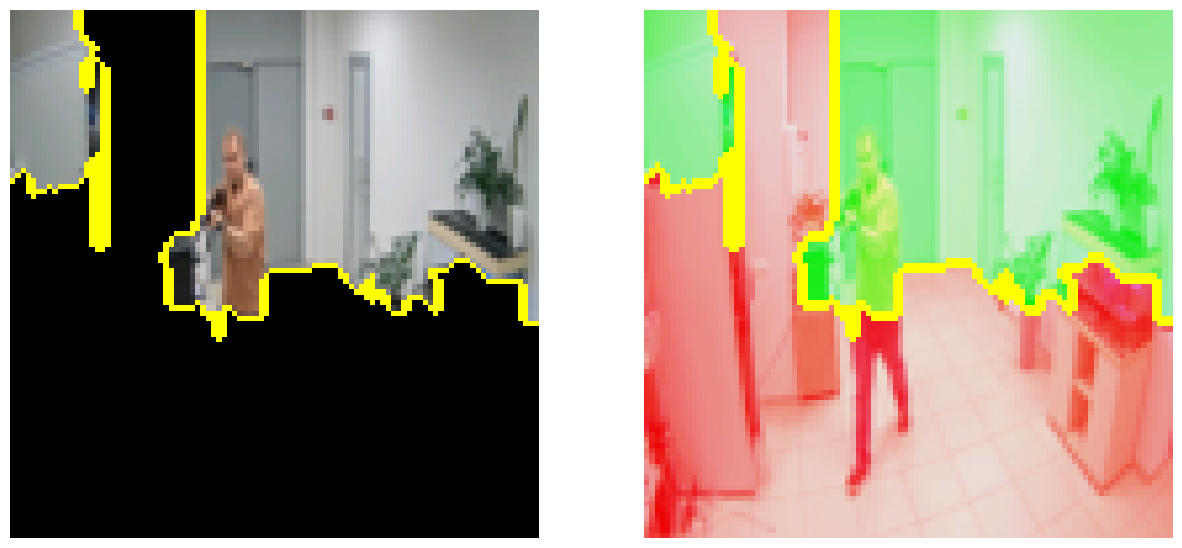

In [ ]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

In [ ]:
from tensorflow.keras.applications import inception_v3 as inc_net
from tensorflow.keras.applications.imagenet_utils import decode_predictions

def transform_img_fn_ori(url):

    img = skimage.io.imread(url)
    img = skimage.transform.resize(img, (299,299))
    img = (img - 0.5)*2
    img = np.expand_dims(img, axis=0)
    preds = inet_model.predict(img)
    for i in decode_predictions(preds)[0]:
        print(i)
    return img

inet_model = inc_net.InceptionV3()
images_inc_im = transform_img_fn_ori(url)

1/1 [==============================] - 2s 2s/step
('n04125021', 'safe', 0.13342117)
('n02977058', 'cash_machine', 0.1062456)
('n03902125', 'pay-phone', 0.09161734)
('n04070727', 'refrigerator', 0.039353784)
('n03761084', 'microwave', 0.03698344)


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


(-0.5, 298.5, 298.5, -0.5)

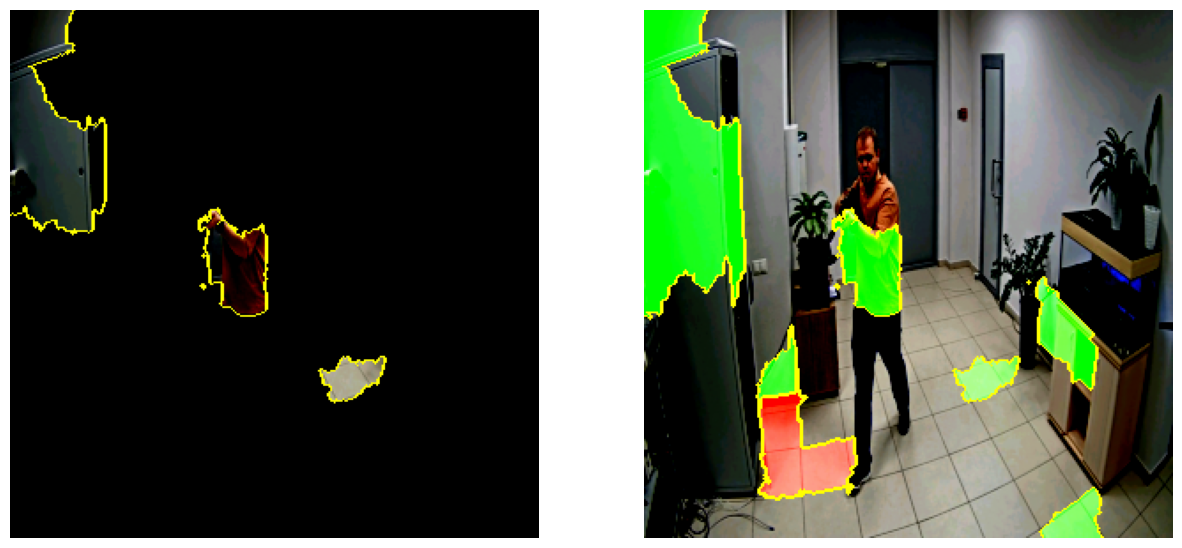

In [ ]:

explanation= explainer.explain_instance(images_inc_im[0].astype('double'), inet_model.predict,  top_labels=3, hide_color=0, num_samples=100)

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')